**Eksplorasi Video Youtube** 

##   **Penyesuaian Format Data**

In [ ]:
video_kompas = pd.read_csv('/content/video_kompas.csv')
video_kompas.head()

,Unnamed: 0,VideoID,Title,PublishedAt,Tags,Duration,Likes,Views,CommentCount
0,0,ON6og3IJMjw,Update Corona 28 April 2022: 412 Kasus Baru Co...,2022-04-28T13:43:34Z,"['covid 19', 'update corona 28 april 2022', 'v...",PT1M19S,7,729,4
1,1,s6A90YfBAOY,"6 Tips Mudik Naik Motor, Cek Kendaraan Hingga ...",2022-04-28T13:30:34Z,"['hari raya idul fitri', 'mudik', 'mudik lebar...",PT1M19S,6,574,1
2,2,_CHGS_4AuBc,"Tol Dalam Kota Mulai Padat, Didominasi Kendara...",2022-04-28T13:24:48Z,"['lalu lintas arus mudik', 'mudik lebaran 2022...",PT12M32S,26,2204,1
3,3,3RSP7kgbXuQ,Hati-hati! Lakukan Ini Supaya Terhindar dari P...,2022-04-28T13:03:17Z,"['cara menghindari pencopet', 'modus modus pen...",PT1M14S,12,2354,3
4,4,O3P3GBwIM74,Waspada Maling Data Pribadi Lewat Aplikasi di ...,2022-04-28T12:44:23Z,"['11 aplikasi pencuri data pribadi', 'aplikasi...",PT7M12S,13,747,1


In [ ]:
video_kompas = video_kompas.drop(video_kompas.columns[0], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
video_kompas = video_kompas.drop_duplicates(subset = 'VideoID')

Data yang dihasilkan memungkinkan adanya duplikasi baris sehingga perlu dihapus terlebih dahulu. 

In [ ]:
video_kompas['PublishedAt'] = pd.to_datetime(video_kompas['PublishedAt']).dt.date
video_kompas['Likes'] = pd.to_numeric(video_kompas['Likes'])
video_kompas['Views'] = pd.to_numeric(video_kompas['Views'])
video_kompas['CommentCount'] = pd.to_numeric(video_kompas['CommentCount'])

Kolom *PublishedAt* diubah menjadi format tanggal. Kolom *Likes*, *Views*, dan *CommentCount* sebelumnya berformat character sehingga diubah menjadi format numeric. Untuk kolom *Duration*, format data akan diubah menjadi total detik. Untuk mengubah format data tersebut dibutuhkan package **isodate**.

In [ ]:
pip install isodate

     |████████████████████████████████| 41 kB 337 kB/s 


In [ ]:
import isodate

In [ ]:
video_kompas['Duration'] = video_kompas['Duration'].apply(
    lambda row: isodate.parse_duration(row).total_seconds()
)

In [ ]:
video_kompas.head()

,VideoID,Title,PublishedAt,Tags,Duration,Likes,Views,CommentCount
0,ON6og3IJMjw,Update Corona 28 April 2022: 412 Kasus Baru Co...,2022-04-28,"['covid 19', 'update corona 28 april 2022', 'v...",79.0,7,729,4
1,s6A90YfBAOY,"6 Tips Mudik Naik Motor, Cek Kendaraan Hingga ...",2022-04-28,"['hari raya idul fitri', 'mudik', 'mudik lebar...",79.0,6,574,1
2,_CHGS_4AuBc,"Tol Dalam Kota Mulai Padat, Didominasi Kendara...",2022-04-28,"['lalu lintas arus mudik', 'mudik lebaran 2022...",752.0,26,2204,1
3,3RSP7kgbXuQ,Hati-hati! Lakukan Ini Supaya Terhindar dari P...,2022-04-28,"['cara menghindari pencopet', 'modus modus pen...",74.0,12,2354,3
4,O3P3GBwIM74,Waspada Maling Data Pribadi Lewat Aplikasi di ...,2022-04-28,"['11 aplikasi pencuri data pribadi', 'aplikasi...",432.0,13,747,1


##   **Eksplorasi Data Video**

**Eksplorasi Peubah Views**

In [ ]:
from numpy.ma.core import mean
views_stat = pd.DataFrame(dict(Channel = 'KompasTV',
                               Mean = mean(video_kompas['Views']),
                               Min = min(video_kompas['Views']),
                               TitleMin =  video_kompas[video_kompas['Views'] == min(video_kompas['Views'])]['Title'].values,
                               Max = max(video_kompas['Views']),
                               TitleMax = video_kompas[video_kompas['Views'] == max(video_kompas['Views'])]['Title'].values), index = [0])
views_stat

,Channel,Mean,Min,TitleMin,Max,TitleMax
0,KompasTV,47546.309141,112,Warga Binaan Lapas Gorontalo Jalani Vaksinasi,5644857,Jokowi Ungkap Terima Cerita Menakutkan saat Am...


Dari syntax diatas, didapatkan statistik rata-rata banyak viewers, banyak viewers terendah, judul dari video dengan banyak viewers terendah, banyak viewers tertinggi, dan judul dari video dengan banyak viewers tertinggi. 

In [ ]:
top10_views = video_kompas.sort_values(by = 'Views', ascending = False).head(10)
top10_views = top10_views[['Title', 'Views', 'PublishedAt']]
top10_views

,Title,Views,PublishedAt
12983,Jokowi Ungkap Terima Cerita Menakutkan saat Am...,5644857,2021-12-23
6853,Menarik Akar Masalah Konflik Rusia dan Ukraina...,5200616,2022-02-24
6644,Pemimpin Chechnya Minta Presiden Ukraina Minta...,4584886,2022-02-26
3185,Angelina Sondakh: Saya Takut…,3901513,2022-04-01
6774,Serbuan Helikopter Rusia di Langit Rumah Warga...,3793035,2022-02-25
16449,Arteria Ungkap Kronologi Lengkap Wanita Ngaku ...,3469874,2021-11-22
5023,Prabowo Subianto Sampaikan Sikap Indonesia ter...,3436739,2022-03-14
13218,Viral Petugas SPBU Bintaro Curang Isi Bensin K...,3424287,2021-12-21
6842,"Kepada AS & NATO, Presiden Rusia Putin: Kami M...",3423735,2022-02-24
6803,Darurat Militer! Rusia Lancarkan Serangan Lebi...,3369335,2022-02-24


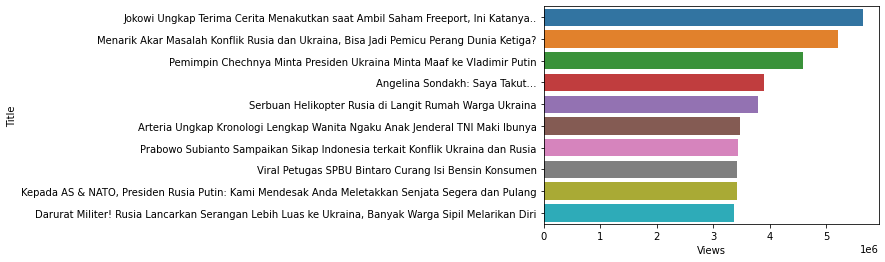

In [ ]:
sns.barplot(x = 'Views', y = 'Title', data = top10_views)

Dari barplot, terlihat bahwa perbedaan banyaknya viewers dari kesepuluh video tersebut cukup merata. Hal ini menunjukkan bahwa tidak ada video yang sangat booming hingga menimbulkan jumlah views yang berbeda jauh. Berdasarkan judulnya, video yang memiliki banyak views mengangkat isu-isu yang intens dengan tokoh yang terkenal seperti saham freeport dengan Jokowi, konflik Ukraina dan Rusia dengan Presiden Ukraina, Vladimir Putin, dan Prabowo Subianto. Selain itu, ada juga video dengan views terbanyak dengan topik yang viral seperti Angelina Sondakh, konflik Arteria, dan Petugas SPBU Bintaro.

**Eksplorasi Peubah Likes**

In [ ]:
top10_likes = video_kompas.sort_values(by = 'Likes', ascending = False).head(10)
top10_likes = top10_likes[['Title', 'Likes', 'PublishedAt']]
top10_likes

,Title,Likes,PublishedAt
3185,Angelina Sondakh: Saya Takut…,87214,2022-04-01
10354,Hoax! Pesawat Garuda Indonesia Crash Saat Land...,86547,2022-01-20
12983,Jokowi Ungkap Terima Cerita Menakutkan saat Am...,46949,2021-12-23
6853,Menarik Akar Masalah Konflik Rusia dan Ukraina...,44707,2022-02-24
16449,Arteria Ungkap Kronologi Lengkap Wanita Ngaku ...,31334,2021-11-22
6644,Pemimpin Chechnya Minta Presiden Ukraina Minta...,31018,2022-02-26
10513,Detik-detik Gempa Bubarkan Live Rock Geeks. Pe...,30696,2022-01-18
11326,Media Malaysia Pakai Video Jokowi Beri Jalan A...,29473,2022-01-10
19897,Hotman Paris Unggah Video Jokowi Disambut Meri...,26077,2021-10-31
2173,"Disebut jadi Sumber Isu Tiga Periode, Masinton...",25328,2022-04-11


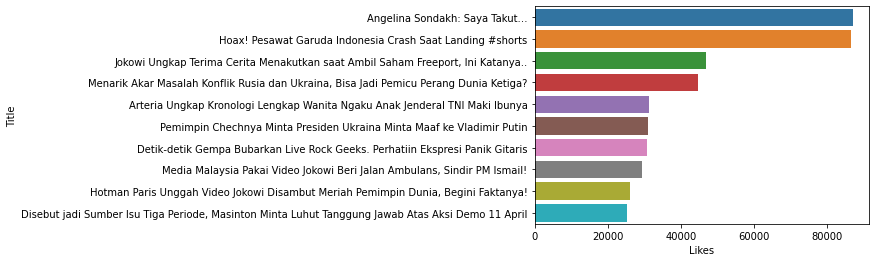

In [ ]:
sns.barplot(x = 'Likes', y = 'Title', data = top10_likes)

Berbeda dengan peubah Views, video dengan likes terbanyak cenderung terkait dengan topik-topik yang sangat viral. Video dengan views terbanyak juga cenderung muncul sebagai video dengan likes terbanyak.  

**Eksplorasi Peubah PublishedAt**

In [ ]:
videos_perday_kompas = video_kompas.groupby('PublishedAt', as_index=False).size()
videos_perday_kompas

,PublishedAt,size
0,2021-10-31,58
1,2021-11-01,163
2,2021-11-02,184
3,2021-11-03,176
4,2021-11-04,182
...,...,...
175,2022-04-24,105
176,2022-04-25,210
177,2022-04-26,179
178,2022-04-27,136


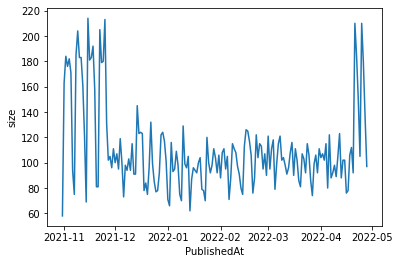

In [ ]:
sns.lineplot(x = 'PublishedAt', y = 'size', data = videos_perday_kompas)

Dari plot, terlihat bahwa bahwa banyak video yang diunggah pada hari Minggu cenderung lebih sedikit daripada hari lainnya. Pada Desember 2021 - April 2022, KompasTV hanya menggunggah sekitar 70-120 video. Namun, pada November tahun 2021 dan Mei 2022 Kompas TV mengunggah sekitar 180-220 video tiap harinya. Untuk mengetahui, topik bahasan apa saja yang diberitakan pada November 2021 akan dilakukan eksplorasi menggunakan text mining pada peubah Title.

**Eksplorasi Peubah Title**

Seleksi Data November 2021

In [ ]:
video_kompas['PublishedAt'] = pd.to_datetime(video_kompas['PublishedAt'])
video_Nov2021 = video_kompas.set_index(video_kompas['PublishedAt'])
video_Nov2021 = video_Nov2021.loc[(video_Nov2021['PublishedAt'] >= '2021-11-01') & (video_Nov2021['PublishedAt'] <= '2021-11-30'),:]

*Case folding*, Penghapusan Angka, Tanda Baca, dan Spasi berlebih

In [ ]:
import re

In [ ]:
def tweetCleaning(kalimat):
  kalimat = str(kalimat).lower()
  kalimat = re.sub('[^0-9A-Za-z \t]',' ', kalimat) 
  kalimat = re.sub('\w+:\/\/\S+', ' ', kalimat) 
  kalimat = re.sub('[0-9]+', ' ', kalimat)
  kalimat = re.sub(' +', ' ', kalimat)
  return kalimat

In [ ]:
Title_Nov2021 = video_Nov2021['Title'].apply(tweetCleaning)

In [ ]:
Title_Nov2021

PublishedAt
2021-11-30    penembakan misterius di exit tol bintaro terun...
2021-11-30    tangis keluarga pecah mengiringi pemakaman jen...
2021-11-30    seorang pria ketahuan menguntit buah sabun pem...
2021-11-30    kebakaran gudang di cikupa turut membakar mobi...
2021-11-30    gubernur dki jakarta tunjuk ahmad sahroni jadi...
                                    ...                        
2021-11-01    keindahan alam desa wisata ngilngof dengan pas...
2021-11-01    di akhir pekan pantai pasir putih carita mulai...
2021-11-01    satgas covid beberkan persiapan masa transisi ...
2021-11-01    sejumlah negara g sepakat bentuk satuan kerja ...
2021-11-01    mantap budidaya sansevieria alias lidah mertua...
Name: Title, Length: 4563, dtype: object

Stemming

Stemming adalah proses mengubah kata menjadi bentuk dasarnya. Hal ini dilakukan untuk mengurangi tempat penyimpanan istilah, mengurangi jumlah kata yang terambil, dan memperluas arti dari suatu istilah.

In [ ]:
pip install sastrawi

     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_init = StemmerFactory().create_stemmer()
def stemmer(word):
    return stem_init.stem(word)

In [ ]:
Title_Nov2021 = Title_Nov2021.apply(stemmer)

In [ ]:
Title_Nov2021

PublishedAt
2021-11-30    tembak misterius di exit tol bintaro ungkap la...
2021-11-30    tangis keluarga pecah iring makam jenazah korb...
2021-11-30    orang pria tahu kuntit buah sabun bersih wajah...
2021-11-30    bakar gudang di cikupa turut bakar mobil sebab...
2021-11-30    gubernur dki jakarta tunjuk ahmad sahroni jadi...
                                    ...                        
2021-11-01    indah alam desa wisata ngilngof dengan pasir p...
2021-11-01    di akhir pekan pantai pasir putih carita mulai...
2021-11-01    satgas covid kan siap masa transisi pandemi ja...
2021-11-01    jumlah negara g sepakat bentuk satu kerja untu...
2021-11-01    mantap budidaya sansevieria alias lidah mertua...
Name: Title, Length: 4563, dtype: object

Penghapusan Stopword

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dan lain lain. Dengan menghapus stopword, kita menghapus kata-kata yang memiliki informasi rendah sehingga kita menjadi fokus pada kata-kata penting dalam sebuah kalimat.

In [ ]:
pip install nltk

In [3]:
%%capture
import nltk
from nltk.corpus import stopwords
nltk.download('popular')

In [ ]:
def remove_stop_words(word_list):
  stop_words = set(stopwords.words('indonesian'))
  return ' '.join([word for word in word_list.split(' ') if word not in stop_words])

In [ ]:
Title_Nov2021 = Title_Nov2021.apply(remove_stop_words)

In [ ]:
Title_Nov2021

PublishedAt
2021-11-30    tembak misterius exit tol bintaro laku nyata p...
2021-11-30    tangis keluarga pecah iring makam jenazah korb...
2021-11-30    orang pria kuntit buah sabun bersih wajah mini...
2021-11-30        bakar gudang cikupa bakar mobil bakar selidik
2021-11-30    gubernur dki jakarta ahmad sahroni ketua laksa...
                                    ...                        
2021-11-01    indah alam desa wisata ngilngof pasir pantai h...
2021-11-01    pekan pantai pasir putih carita padat unjung d...
2021-11-01                 satgas covid transisi pandemi endemi
2021-11-01    negara g sepakat bentuk kerja pulih ekonomi se...
2021-11-01    mantap budidaya sansevieria alias lidah mertua...
Name: Title, Length: 4563, dtype: object

Membuat Document Term Matrix

*Document Term Matrix* adalah matriks yang berisi frekuensi kata-kata atau frasa dalam tiap dokumen. Dalam hal ini, baris pada *Document Term Matrix* merepresentasikan suatu judul berita, kolom merepresentasikan frasa yang ada pada judul berita tersebut, dan sel merepresentasikan banyaknya kata pada dari kolom tersebut muncul pada judul berita. 

In [ ]:
pip install sklearn

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range =(3,3), min_df = 10)
doc_matrix = vectorizer.fit_transform(Title_Nov2021)
doc_matrix = doc_matrix.toarray()

In [ ]:
doc_df = pd.DataFrame(data = doc_matrix)
doc_df.columns = vectorizer.get_feature_names()
display(doc_df.head())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,andika perkasa panglima,bakar tangki kilang,bandang kota batu,banjir bandang kota,calon panglima tni,corona indonesia november,covid indonesia november,duga leceh seksual,harga minyak goreng,indonesia november positif,...,polisi tangkap laku,presiden joko widodo,sopir vanessa angel,tangan covid indonesia,tni andika perkasa,tni jenderal andika,update corona indonesia,uu cipta kerja,vanessa angel suami,varian covid omicron
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Membuat n-gram

Salah satu eksplorasi sederhana dalam text mining yaitu membentuk n-gram. N-gram digunakan untuk mengetahui frasa-frasa yang sering muncul dalam dokumen. Dalam hal ini, digunakan 3-gram yang berarti frasa yang digunakan berasal dari 3 kata. 

In [ ]:
doc_df.loc['Total',:] = doc_df.sum(axis=0)
doc_df.iloc[:, np.argsort(doc_df.loc['Total'])]

,lantik panglima tni,tni andika perkasa,tangan covid indonesia,presiden joko widodo,polisi tangkap laku,indonesia november positif,varian covid omicron,bakar tangki kilang,vanessa angel suami,covid indonesia november,...,update corona indonesia,panglima tni jenderal,tni jenderal andika,sopir vanessa angel,banjir bandang kota,bandang kota batu,perkasa panglima tni,andika perkasa panglima,calon panglima tni,jenderal andika perkasa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total = doc_df.loc['Total'].sort_values(ascending = False)

In [ ]:
import matplotlib.pyplot as plt

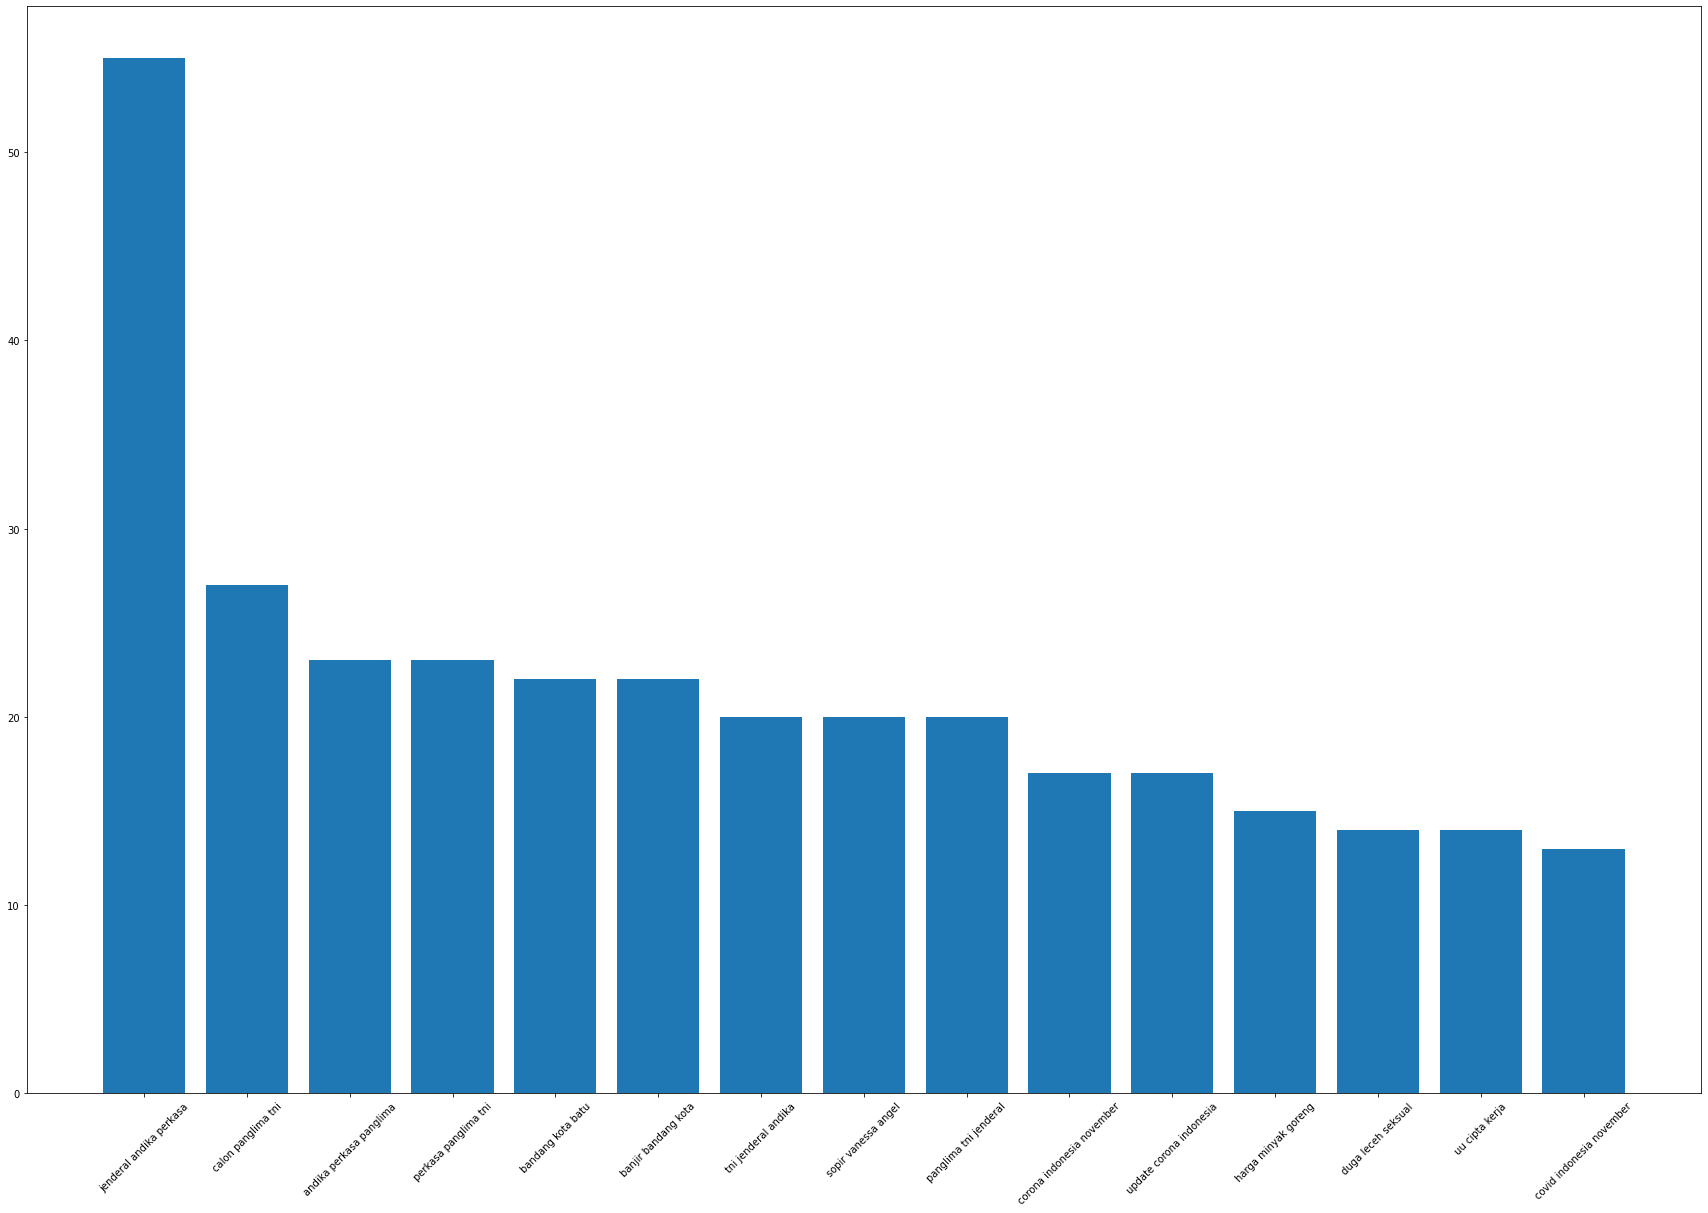

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (30, 20))
plt.bar(total[:15].index, total[:15])
plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)
plt.xticks(rotation = 45)
plt.show()

Dari plot, terlihat bahwa terdapat beberapa kejadian besar yang terjadi pada bulan November 2021. Kejadian yang sering dibahas dalam berita diantaranya diangkatnya Jendral Andika Perkasa menjadi panglima TNI, banjir bandang di Kota Batu, dan dugaan pelecehan seksual di Kampus Unri. Topik bahasan lainnya pada bulan November 2021 yaitu kontroversi sopir Vanessa Angel yang selamat dari kecelakaan jalan tol, update COVID-19 Indonesia, UU Cipta Kerja yang dinyatakan inkonstitusional bersyarat, dan naiknya harga minyak goreng hingga Rp24.000 per liter.

**Eksplorasi Peubah Duration**

In [ ]:
video_kompas.head()

,VideoID,Title,PublishedAt,Tags,Duration,Likes,Views,CommentCount
0,ON6og3IJMjw,Update Corona 28 April 2022: 412 Kasus Baru Co...,2022-04-28,"['covid 19', 'update corona 28 april 2022', 'v...",79.0,7,729,4
1,s6A90YfBAOY,"6 Tips Mudik Naik Motor, Cek Kendaraan Hingga ...",2022-04-28,"['hari raya idul fitri', 'mudik', 'mudik lebar...",79.0,6,574,1
2,_CHGS_4AuBc,"Tol Dalam Kota Mulai Padat, Didominasi Kendara...",2022-04-28,"['lalu lintas arus mudik', 'mudik lebaran 2022...",752.0,26,2204,1
3,3RSP7kgbXuQ,Hati-hati! Lakukan Ini Supaya Terhindar dari P...,2022-04-28,"['cara menghindari pencopet', 'modus modus pen...",74.0,12,2354,3
4,O3P3GBwIM74,Waspada Maling Data Pribadi Lewat Aplikasi di ...,2022-04-28,"['11 aplikasi pencuri data pribadi', 'aplikasi...",432.0,13,747,1


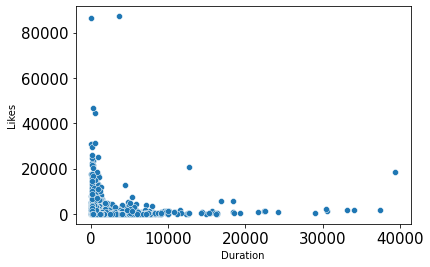

In [ ]:
sns.scatterplot(x = 'Duration', y = 'Likes', data = video_kompas)

In [ ]:
video_kompas.loc[3185,]

VideoID                                               51RAIarHbTM
Title                               Angelina Sondakh: Saya Takut…
PublishedAt                                   2022-04-01 00:00:00
Tags            ['rosi', 'angelina sondakh', 'talkshow', 'rosi...
Duration                                                   3672.0
Likes                                                       87214
Views                                                     3901513
CommentCount                                                19473
Name: 3185, dtype: object

In [ ]:
video_kompas.loc[10354,]

VideoID                                               nwaSOl7hzsk
Title           Hoax! Pesawat Garuda Indonesia Crash Saat Land...
PublishedAt                                   2022-01-20 00:00:00
Tags            ['garuda indonesia', 'hoax pesawat jatuh', 'pe...
Duration                                                     60.0
Likes                                                       86547
Views                                                     2966914
CommentCount                                                 2055
Name: 10354, dtype: object

Dari scatterplot, terlihat bahwa KompasTV memiliki selang durasi yang lebar yang berarti durasi dari tiap video beragam dari yang hanya 1 menit sampai dengan 8 jam. Video dengan durasi panjang biasanya merupakan video *live stream* yang telah dilakukan. Video berdurasi pendek lebih banyak disukai daripada video-video berdurasi panjang. Terdapat 2 video berdurasi pendek yang mencapai 80.000 likes yaitu video dengan judul "Angelina Sondakh: Saya Takut…" dengan durasi 1 jam 1 menit dan "Hoax! Pesawat Garuda Indonesia Crash Saat Landing #short" dengan durasi 1 menit. 
